# Analysis: Base Accumulation by Player Ability
***

In this notebook, I evaluate my proposed statistic, Base Accumulation by Player Ability. I compare the statistic to other common baseball statistics by performing linear regression analyses.

In [2]:
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

**Load the data into a dataframe**

In [6]:
local_path = '../data/PlayerDataWithHeadings.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
playerDataDF = pd.read_csv(file_path)

# Inspect some of the data
playerDataDF.head()

,nameFirst,nameLast,playerID,yearID,teamID,lgID,H,1B,2B,3B,...,BB,HBP,SB,CS,AB,BA,OBP,SLG,BAPA,LWTS
0,David,Aardsma,aardsda01,2004,SFN,NL,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.00
1,David,Aardsma,aardsda01,2006,CHN,NL,0,0,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,0.0,-0.50
2,David,Aardsma,aardsda01,2007,CHA,AL,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.00
3,David,Aardsma,aardsda01,2008,BOS,AL,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,-0.25
4,David,Aardsma,aardsda01,2009,SEA,AL,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.00


**Regression Analysis: BAPA vs OBP**

y = 0.367100990094 * x + 0.0945894822917
Mean squared error: 0.01
Variance score: 0.72


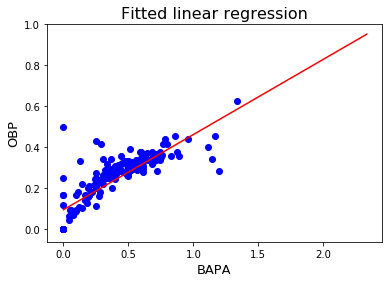

In [10]:
regr = linear_model.LinearRegression()
stat1 = 'BAPA'
stat2 = 'OBP'
df = playerDataDF[[stat1, stat2]].copy()
df = df.dropna(axis=0, how='any')

x = df[stat1]
y = df[stat2]
test_size = int(len(df) * 0.20)
min_x = min(x)
max_x = max(x)

train_data_X = map(lambda x: [x], list(x[:-test_size]))
train_data_Y = list(y[:-test_size])
test_data_X = map(lambda x: [x], list(x[-test_size:]))
test_data_Y = list(y[-test_size:])
regr.fit(train_data_X, train_data_Y)
m = regr.coef_[0]
b = regr.intercept_
print('y = {0} * x + {1}'.format(m, b))

plt.scatter(test_data_X, test_data_Y, color='blue')
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel(stat1, fontsize=13)
plt.ylabel(stat2, fontsize=13)

print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))

**Regression Analysis: BAPA vs Batting Average**

y = 0.313255850479 * x + 0.0783732783218
Mean squared error: 0.00
Variance score: 0.74


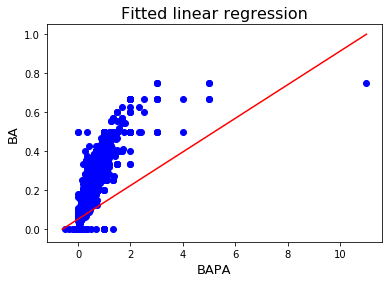

In [23]:
regr = linear_model.LinearRegression()
stat1 = 'BAPA'
stat2 = 'BA'
df = playerDataDF[[stat1, stat2]].copy()
df = df.dropna(axis=0, how='any')

x = df[stat1]
y = df[stat2]
test_size = int(len(df) * 0.20)
min_x = min(x)
max_x = max(x)

train_data_X = map(lambda x: [x], list(x[:-test_size]))
train_data_Y = list(y[:-test_size])
test_data_X = map(lambda x: [x], list(x[-test_size:]))
test_data_Y = list(y[-test_size:])
regr.fit(train_data_X, train_data_Y)
m = regr.coef_[0]
b = regr.intercept_
print('y = {0} * x + {1}'.format(m, b))

plt.scatter(test_data_X, test_data_Y, color='blue')
plt.plot([min_x, max_x], [0, 1], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel(stat1, fontsize=13)
plt.ylabel(stat2, fontsize=13)

print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))

**Regression Analysis: BAPA vs Slugging Percentage**

y = 0.593766315828 * x + 0.0555790311689
Mean squared error: 0.00
Variance score: 0.95


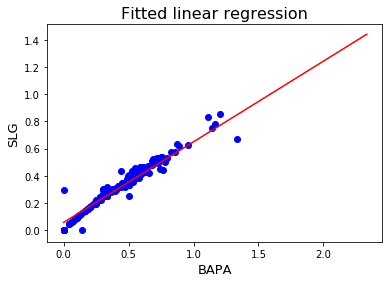

In [12]:
regr = linear_model.LinearRegression()
stat1 = 'BAPA'
stat2 = 'SLG'
df = playerDataDF[[stat1, stat2]].copy()
df = df.dropna(axis=0, how='any')

x = df[stat1]
y = df[stat2]
test_size = int(len(df) * 0.20)
min_x = min(x)
max_x = max(x)

train_data_X = map(lambda x: [x], list(x[:-test_size]))
train_data_Y = list(y[:-test_size])
test_data_X = map(lambda x: [x], list(x[-test_size:]))
test_data_Y = list(y[-test_size:])
regr.fit(train_data_X, train_data_Y)
m = regr.coef_[0]
b = regr.intercept_
print('y = {0} * x + {1}'.format(m, b))

plt.scatter(test_data_X, test_data_Y, color='blue')
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel(stat1, fontsize=13)
plt.ylabel(stat2, fontsize=13)

print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))

**Regression Analysis: BAPA vs Linear Weights**

y = 19.2146956093 * x + -6.0084785459
Mean squared error: 141.97
Variance score: 0.20


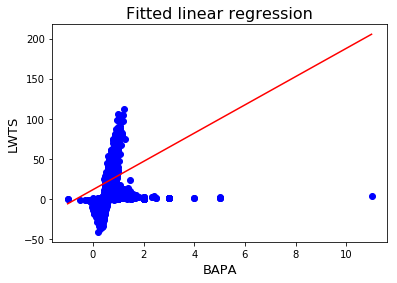

In [13]:
regr = linear_model.LinearRegression()
stat1 = 'BAPA'
stat2 = 'LWTS'
df = playerDataDF[[stat1, stat2]].copy()
df = df.dropna(axis=0, how='any')

x = df[stat1]
y = df[stat2]
test_size = int(len(df) * 0.20)
min_x = min(x)
max_x = max(x)

train_data_X = map(lambda x: [x], list(x[:-test_size]))
train_data_Y = list(y[:-test_size])
test_data_X = map(lambda x: [x], list(x[-test_size:]))
test_data_Y = list(y[-test_size:])
regr.fit(train_data_X, train_data_Y)
m = regr.coef_[0]
b = regr.intercept_
print('y = {0} * x + {1}'.format(m, b))

plt.scatter(test_data_X, test_data_Y, color='blue')
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel(stat1, fontsize=13)
plt.ylabel(stat2, fontsize=13)

print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))

**Top Ranked Players by BAPA**

In [27]:
topPlayersDF = playerDataDF.sort_values(by=['BAPA'], ascending=False)
topPlayersDF = topPlayersDF[['nameFirst', 'nameLast', 'yearID', 'AB', 'BA', 'BAPA', 'LWTS']].copy()
topPlayersDF.head(10)

,nameFirst,nameLast,yearID,AB,BA,BAPA,LWTS
82337,Jeff,Stone,1983,4.0,0.7500,11.0,3.45
52101,Jeff,Manto,2000,5.0,0.8000,9.0,3.87
48676,Brian,Lesher,2000,5.0,0.8000,8.0,3.12
30410,Esteban,German,2005,4.0,0.7500,6.0,2.07
36076,Hal,Haydel,1970,3.0,0.6667,6.0,1.95
3562,Wladimir,Balentien,2007,3.0,0.6667,6.0,1.95
56496,Henry,Mercedes,1992,5.0,0.8000,6.0,2.15
40954,Ed,Irwin,1912,3.0,0.6667,6.0,1.79
37865,Charlie,Hickman,1897,3.0,0.6667,5.0,1.61
32106,Terrance,Gore,2014,1.0,0.0000,5.0,1.58


In [28]:
topPlayersDF = topPlayersDF[topPlayersDF.AB > 300]
topPlayersDF.head(10)

,nameFirst,nameLast,yearID,AB,BA,BAPA,LWTS
23276,Hugh,Duffy,1894,539.0,0.4397,1.3974,113.25
63545,Tip,O'Neill,1887,517.0,0.4352,1.3253,99.13
74508,Babe,Ruth,1921,540.0,0.3778,1.3209,135.69
16051,Ty,Cobb,1911,591.0,0.4196,1.3120,107.33
7894,Barry,Bonds,2001,476.0,0.3277,1.3034,135.86
74507,Babe,Ruth,1920,457.0,0.3764,1.2977,122.20
7897,Barry,Bonds,2004,373.0,0.3619,1.2887,136.49
7895,Barry,Bonds,2002,403.0,0.3697,1.2852,129.75
39361,Rogers,Hornsby,1925,504.0,0.4028,1.2599,102.08
85286,Sam,Thompson,1894,437.0,0.4073,1.2510,75.06


**Top Players by LWTS**

In [29]:
topPlayersLWTS = playerDataDF.sort_values(by=['LWTS'], ascending=False)
topPlayersLWTS = topPlayersLWTS[['nameFirst', 'nameLast', 'yearID', 'AB', 'BA', 'BAPA', 'LWTS']].copy()
topPlayersLWTS.head(10)

,nameFirst,nameLast,yearID,AB,BA,BAPA,LWTS
7897,Barry,Bonds,2004,373.0,0.3619,1.2887,136.49
7894,Barry,Bonds,2001,476.0,0.3277,1.3034,135.86
74508,Babe,Ruth,1921,540.0,0.3778,1.3209,135.69
7895,Barry,Bonds,2002,403.0,0.3697,1.2852,129.75
74510,Babe,Ruth,1923,522.0,0.3927,1.1686,126.09
74507,Babe,Ruth,1920,457.0,0.3764,1.2977,122.20
30210,Lou,Gehrig,1927,584.0,0.3733,1.2005,115.88
74514,Babe,Ruth,1927,540.0,0.3556,1.1808,115.77
34957,Billy,Hamilton,1894,544.0,0.4044,1.1883,114.81
74511,Babe,Ruth,1924,529.0,0.3781,1.1316,113.25
